# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()]
                              )

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

# Create validation set and define validation dataloader
valid_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

100%|██████████| 9912422/9912422 [00:00<00:00, 78912705.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22748487.10it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 21598796.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5438346.78it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

- I used RandomRotation and Random Horizontal Flip to ensure that the model will generalize better and remain consistent in performance even with variations in input data
- The ToTensor transform ensures that the data is converted to tensors that can be inputed into the models

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Number of samples in train set: 60000
Number of samples in validation set: 60000
Number of samples in test set: 10000
0


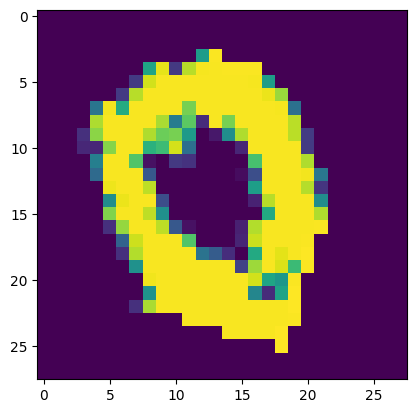

4


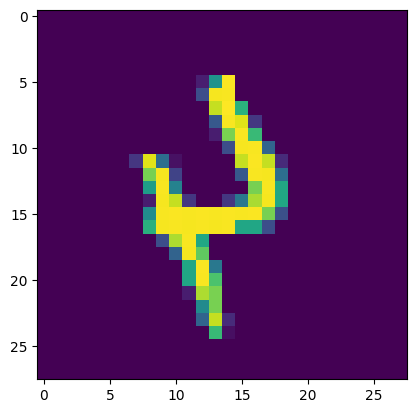

2


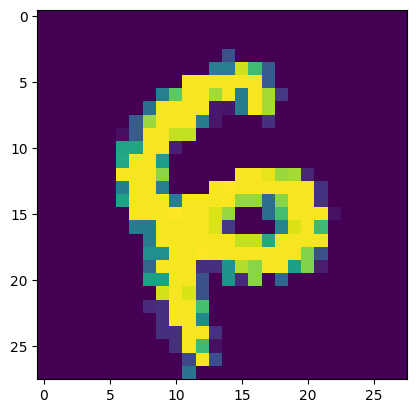

1


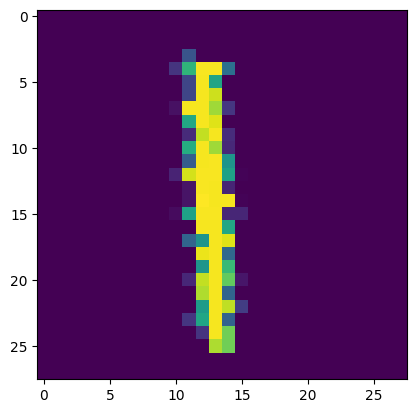

0


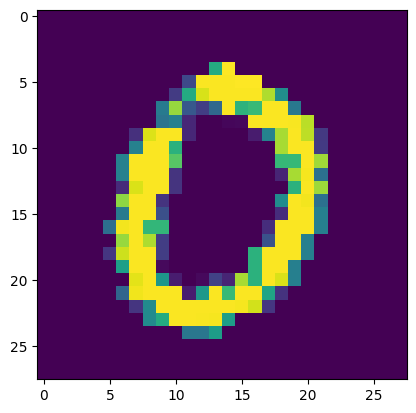

In [5]:
# Explore data
print('Number of samples in train set:', len(train_loader.dataset))
print('Number of samples in validation set:', len(valid_loader.dataset))
print('Number of samples in test set:', len(test_loader.dataset))
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.log_softmax
        self.fc1 = nn.Linear(28 * 28, 1280)
        self.fc2 = nn.Linear(1280, 900)
        self.fc3 = nn.Linear(900, 10)

    def forward(self, x):
        x = torch.flatten(x,1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x), dim= 1)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# Instantiate model
model = MNIST_Classifier()

## YOUR CODE HERE ##
criterion = nn.NLLLoss()


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
def train(model, criterion, lr=0.001, num_epochs = 10):

    # Specify optimizer
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    # Specify Device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


    # Send model to device
    model.to(device)

    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):

            # data is a list of [inputs, labels]
            inputs, labels = data

            # Send to device
            inputs, labels = inputs.to(device), labels.to(device)

            # Initialize with zero gradient
            optimizer.zero_grad()

            # model output
            outputs = model(inputs)

            # Backward and forward passes
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs.data, 1)

            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()


        # Validation
        val_loss = 0.0
        val_correct = 0
        model.eval()
        accuracy = 0
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            with torch.no_grad():
                outputs = model.forward(inputs)
                val_loss = criterion(outputs, labels)

                # Get accuracy
                ps = torch.exp(outputs).data
                equality = (labels.data == ps.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()

        val_accuracy = (accuracy /len(valid_loader)) * 100
        train_accuracy = train_correct/len(train_loader)
        train_loss = train_loss/len(train_loader)
        val_loss = val_loss/len(test_loader)
        val_loss = val_loss.cpu().numpy()

        # logs
        print(f'Epoch {epoch + 1} training loss: {train_loss:.5f} validation loss: {val_loss:.5f} validation accuracy: {val_accuracy:.2f}%')

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return model,train_loss_history, val_loss_history


In [9]:
# Train model
model, train_loss_history, val_loss_history = train(model, criterion)

Epoch 1 training loss: 1.78837 validation loss: 0.00591 validation accuracy: 69.44%
Epoch 2 training loss: 0.87937 validation loss: 0.00730 validation accuracy: 74.55%
Epoch 3 training loss: 0.75462 validation loss: 0.00368 validation accuracy: 77.33%
Epoch 4 training loss: 0.69774 validation loss: 0.00658 validation accuracy: 78.84%
Epoch 5 training loss: 0.64156 validation loss: 0.00478 validation accuracy: 80.81%
Epoch 6 training loss: 0.58997 validation loss: 0.00334 validation accuracy: 82.35%
Epoch 7 training loss: 0.54481 validation loss: 0.00343 validation accuracy: 84.09%
Epoch 8 training loss: 0.50024 validation loss: 0.00330 validation accuracy: 85.38%
Epoch 9 training loss: 0.46044 validation loss: 0.00456 validation accuracy: 86.57%
Epoch 10 training loss: 0.42570 validation loss: 0.00557 validation accuracy: 87.50%


Plot the training loss (and validation loss/accuracy, if recorded).

In [10]:
val_loss_history

[array(0.00590718, dtype=float32),
 array(0.00729734, dtype=float32),
 array(0.0036801, dtype=float32),
 array(0.00657995, dtype=float32),
 array(0.00478262, dtype=float32),
 array(0.00334185, dtype=float32),
 array(0.00343381, dtype=float32),
 array(0.00329575, dtype=float32),
 array(0.00455544, dtype=float32),
 array(0.00556904, dtype=float32)]

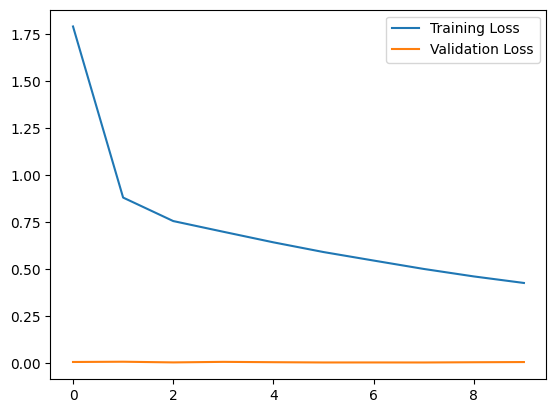

In [11]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
## YOUR CODE HERE ##
# Specify Device
def test(model):
    # Specify Device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            predicted = model(inputs)

            # Calculate accuracy
            ps = torch.exp(predicted)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    accuracy = accuracy/len(test_loader)
    return accuracy

# Accuracy on test set
print(f"Test accuracy: {test(model):.3f}")

Test accuracy: 0.880


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
## YOUR CODE HERE ##
# Instantiate model
model = MNIST_Classifier()

# Train with new hyperparameters
model, train_loss_history, val_loss_history = train(model, criterion, lr = 0.005, num_epochs= 13)

Epoch 1 training loss: 0.99276 validation loss: 0.00234 validation accuracy: 79.75%
Epoch 2 training loss: 0.52575 validation loss: 0.00230 validation accuracy: 87.07%
Epoch 3 training loss: 0.38001 validation loss: 0.00144 validation accuracy: 89.74%
Epoch 4 training loss: 0.30854 validation loss: 0.00107 validation accuracy: 91.27%
Epoch 5 training loss: 0.26273 validation loss: 0.00101 validation accuracy: 92.28%
Epoch 6 training loss: 0.23424 validation loss: 0.00109 validation accuracy: 93.14%
Epoch 7 training loss: 0.20925 validation loss: 0.00114 validation accuracy: 93.99%
Epoch 8 training loss: 0.19581 validation loss: 0.00228 validation accuracy: 93.97%
Epoch 9 training loss: 0.17912 validation loss: 0.00164 validation accuracy: 94.86%
Epoch 10 training loss: 0.16600 validation loss: 0.00068 validation accuracy: 95.07%
Epoch 11 training loss: 0.16148 validation loss: 0.00075 validation accuracy: 95.40%
Epoch 12 training loss: 0.15044 validation loss: 0.00031 validation accura

In [14]:
# Accuracy on test set
print(f"Test accuracy: {test(model):.3f}")

Test accuracy: 0.954


## Saving your model
Using `torch.save`, save your model for future loading.

In [29]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), './mnist_classifier.pth')